In [3]:
# data ingestion 

import pandas as pd

# read the data
data = pd.read_csv("data\data.csv")

In [4]:
#data transformation

data = data.drop('meme_id', axis=1)

data = data.drop_duplicates(subset=['text'])



In [5]:
print(data['emotion_label'].value_counts())

emotion_label
neutral                1104
surprised               646
angry                   577
heroism                 481
happy                   453
wonder                  404
disgust                 350
sad                     328
confused                219
fearful                 172
peace                    42
angry, fearful           21
confused                 19
neutral, happy           17
neutral, angry           12
happy, surprised         11
neutral, sad              9
neutral, fearful          7
neutral, suprised         7
happy, surprised          6
neutral, surprised        6
disgust                   6
neutral, surprised        5
angry, neutral            5
sad, happy                5
fearful, angry            4
sad,happy                 4
angry, happy              4
neutral, wonder           4
surprised, angry          3
suprised                  3
 fearful                  3
su                        3
happy, angry              2
tension                   2
excite

In [6]:
# Removing the double emotions

data = data[~data['emotion_label'].str.contains(',')]
print(data['emotion_label'].value_counts())

emotion_label
neutral       1104
surprised      646
angry          577
heroism        481
happy          453
wonder         404
disgust        350
sad            328
confused       219
fearful        172
peace           42
confused        19
disgust          6
suprised         3
su               3
 fearful         3
excitement       2
tension          2
neural           1
Name: count, dtype: int64


In [7]:
# correcting the typos
typos_to_correct = {
    'suprised': 'surprised',
    'disgust ': 'disgust',
    'confused ': 'confused',
    'su': 'surprised',
    ' fearful': 'fearful',
    'neural': 'neutral'
}

data['emotion_label'] = data['emotion_label'].replace(typos_to_correct)

print(data['emotion_label'].value_counts())

emotion_label
neutral       1105
surprised      652
angry          577
heroism        481
happy          453
wonder         404
disgust        356
sad            328
confused       238
fearful        175
peace           42
excitement       2
tension          2
Name: count, dtype: int64


In [8]:
# drop emotion labels having less than 10 samples

data = data[data['emotion_label'] != 'peace']
data = data[data['emotion_label'] != 'excitement']
data = data[data['emotion_label'] != 'tension']
print(data['emotion_label'].value_counts())

emotion_label
neutral      1105
surprised     652
angry         577
heroism       481
happy         453
wonder        404
disgust       356
sad           328
confused      238
fearful       175
Name: count, dtype: int64


In [9]:
# saving the cleaned data
data.to_csv('data\data_cleaned.csv', index=False)

In [10]:
# converting the tenglish data using transliteration
from indic_transliteration.sanscript import transliterate, TELUGU, HK

def preprocess_tenglish(text):
    # Transliterate Telugu to English
    try:
        text = transliterate(text, TELUGU, HK)  # Telugu script to phonetic English
    except:
        pass
    # Lowercase and normalize
    text = text.lower()
    return text

data['processed_text'] = data['text'].apply(preprocess_tenglish)

print(data['processed_text'])


7                              me: bale cute ga unnav ani
8       crush: midha cheyi vesav ante princi complaint...
9                 my crush with me: entra ala chusthunav?
10            me: vaadu ante evadiki bhayam ledhu ikkada 
11                              me: nee buggalu gillestha
                              ...                        
5095                      me: naa kallathooo chudu mowaa!
5096                my frnd: em undhiraa aah ammayilooo!!
5097                  my dog putting dust after peeing ..
5098                                  ra class ki podham 
5099                   ratri motam chat chesindhi deenika
Name: processed_text, Length: 4769, dtype: object


In [11]:
# Encoding the labels
labels = data['emotion_label'].unique()
label_map = {label: idx for idx, label in enumerate(labels)}
data['encoded_label'] = data['emotion_label'].map(label_map)
data['encoded_label']

7       0
8       0
9       0
10      0
11      0
       ..
5095    7
5096    7
5097    2
5098    1
5099    1
Name: encoded_label, Length: 4769, dtype: int64

In [12]:
%pip install tensorflow

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Tokenizer initialization should be done before using it
tokenizer = Tokenizer()

# Define max vocabulary size and sequence length
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size) # Limit vocabulary size to 10,000 words
max_length = 50     # Maximum sequence length

# Remove classes with less than 2 samples
data_filtered = data.groupby('encoded_label').filter(lambda x: len(x) > 1)
print(data_filtered['encoded_label'].value_counts())

# Tokenize text
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(data_filtered['processed_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(data_filtered['processed_text'])
print(sequences)



# Update X and y
X = pad_sequences(tokenizer.texts_to_sequences(data_filtered['processed_text']), maxlen=max_length)
y = data_filtered['encoded_label']

print(X)

print(data_filtered['processed_text'])
# Split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Note: you may need to restart the kernel to use updated packages.
1
encoded_label
4    1105
3     652
2     577
5     481
0     453
7     404
1     356
9     328
8     238
6     175
Name: count, dtype: int64
[[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1], [1, 1], [1,

In [13]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_train:", X_test.shape)
print("Shape of y_train:", y_test.shape)

Shape of X_train: (3815, 50)
Shape of y_train: (3815,)
Shape of X_train: (954, 50)
Shape of y_train: (954,)


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout

# Set vocabulary size and max length
vocab_size = 10000  # Adjust as needed
max_length = 50  # Maximum sequence length

# Tokenizer with vocab_size limit
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')

# Fit tokenizer on the processed text
tokenizer.fit_on_texts(data_filtered['processed_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(data_filtered['processed_text'])

# Check if there are any indices above vocab_size
max_token_index = max([max(seq) for seq in sequences])
print(f"Max token index in sequences: {max_token_index}, Vocab size: {vocab_size}")

# Ensure sequences are within the vocab size
X = pad_sequences(sequences, maxlen=max_length)

# Update labels and split data
y = data_filtered['encoded_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build the model
embedding_dim = 128
num_classes = len(data_filtered['encoded_label'].unique())

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    SpatialDropout1D(0.2),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile and fit the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=20)
model.summary()


Max token index in sequences: 8119, Vocab size: 10000


c:\Users\Vamshi\Desktop\custommodels\text_classification\venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.2199 - loss: 2.2395
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.2366 - loss: 2.1858
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.2622 - loss: 2.0393
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.4644 - loss: 1.6101
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.6586 - loss: 1.0823
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.7727 - loss: 0.7263
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8583 - loss: 0.4738
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.8781 - loss: 0.4078
Epoch 9/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9287 - loss: 0.2604
Epoch 10/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.9358 - loss: 0.2160
Epoch 11/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9534 - loss: 0.1659
Epoch 12/20
120/120 ━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 50, 128)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,261,472 (16.26 MB)

 Trainable params: 1,420,490 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,840,982 (10.84 MB)

In [17]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2062 - loss: 6.9004
Test Loss: 6.5354323387146
Test Accuracy: 0.21069182455539703


In [18]:
# Predict on test data (or any other new data)
predictions = model.predict(X_test)

# For classification, get the class with the highest probability
predicted_classes = predictions.argmax(axis=-1)
print(predicted_classes)

30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step
[4 8 1 9 0 3 4 2 5 6 4 2 4 3 7 3 4 7 5 3 1 0 7 4 5 4 4 4 7 0 4 6 9 3 4 9 7
 9 4 5 6 0 4 4 2 7 5 3 1 1 0 2 4 7 4 0 2 4 4 2 4 0 6 7 7 4 3 1 3 2 9 5 8 4
 4 2 2 7 6 9 3 4 3 1 9 5 4 2 4 3 0 2 5 5 7 4 4 0 5 5 3 2 9 4 3 5 4 4 7 4 0
 5 2 4 4 5 4 2 9 3 3 5 6 1 1 2 4 3 7 2 4 3 4 2 1 3 7 7 5 5 1 0 4 4 0 5 2 7
 7 9 7 4 5 0 0 9 4 2 2 3 9 1 3 4 7 5 4 9 2 2 1 2 0 7 4 3 3 5 2 3 5 4 9 4 7
 4 1 7 4 3 4 1 5 2 4 0 3 4 0 9 3 4 8 2 5 4 1 2 1 0 3 7 5 9 4 4 4 1 2 5 4 0
 3 5 5 6 7 5 3 8 4 5 7 3 0 1 5 7 8 0 4 9 9 9 3 2 4 0 2 0 3 9 2 4 4 5 3 8 6
 4 5 2 4 2 2 9 2 0 0 7 4 4 2 4 3 7 3 2 3 3 0 2 7 4 2 4 4 8 4 0 3 4 4 4 4 1
 1 4 4 0 9 5 2 0 8 1 0 2 7 1 3 5 4 1 1 3 9 6 5 5 7 9 3 3 4 1 5 5 0 0 3 3 2
 4 3 2 0 4 2 3 3 4 5 3 4 0 3 4 1 4 0 0 0 4 4 0 2 2 0 4 3 4 6 2 9 0 0 2 1 9
 8 4 9 4 4 2 0 3 0 9 4 9 5 6 3 4 5 9 8 4 0 3 0 2 4 1 4 3 0 7 4 0 2 4 7 4 5
 4 4 4 5 0 0 0 3 4 4 2 7 4 1 5 3 4 3 4 3 7 9 4 4 5 4 3 4 7 8 7 4 0 4 2 4 5
 9 4 9 4 8 3 5 1 0 2 7 5 2 0 1 4 8 2 4 3 5 4 9 1 5 8 1 4 8 3

In [19]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.9848 - loss: 0.0630 - val_accuracy: 0.2096 - val_loss: 6.5993
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9839 - loss: 0.0596 - val_accuracy: 0.2002 - val_loss: 6.0628
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9792 - loss: 0.0656 - val_accuracy: 0.2075 - val_loss: 6.2224
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9871 - loss: 0.0517 - val_accuracy: 0.2023 - val_loss: 6.6918
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.9831 - loss: 0.0619 - val_accuracy: 0.1855 - val_loss: 6.6375
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.9884 - loss: 0.0457 - val_accuracy: 0.2107 - val_loss: 7.0363
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9875 - loss: 0.0447 - val_accuracy: 0.1950 - val_loss: 6.9905
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9893 - loss: 0.0452 -

In [22]:
data.dtypes


text              object
emotion_label     object
processed_text    object
encoded_label      int64
dtype: object

Note: you may need to restart the kernel to use updated packages.


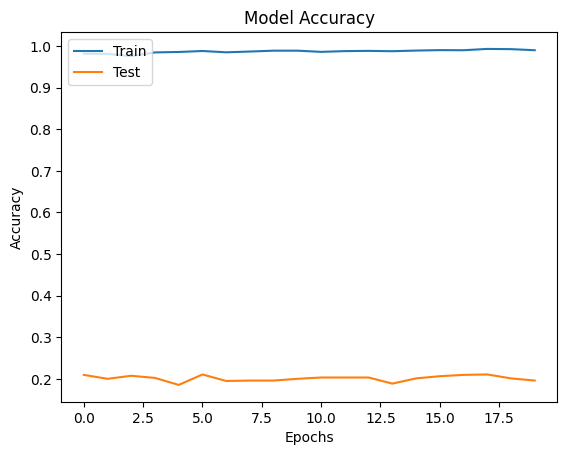

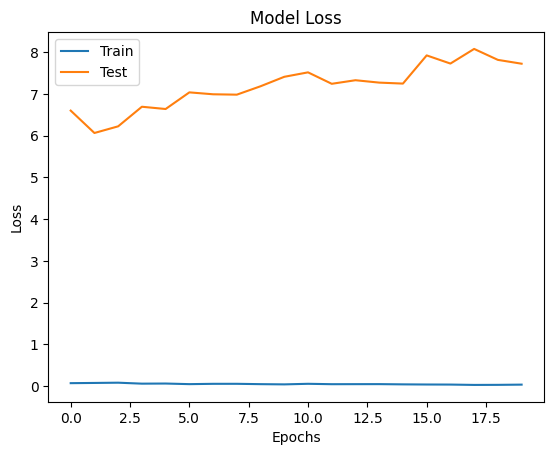

In [23]:
%pip install matplotlib
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
%pip install keras-tuner


In [25]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pickle

# Define the model building function for KerasTuner
def build_model(hp):
    # Define parameters
    embedding_dim = hp.Int('embedding_dim', min_value=50, max_value=300, step=50)  # Hyperparameter search for embedding dimension
    lstm_units = hp.Int('lstm_units', min_value=64, max_value=512, step=64)  # Hyperparameter search for LSTM units
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)  # Hyperparameter search for dropout rate
    
    model = Sequential()
    
    # Embedding layer
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
    model.add(SpatialDropout1D(0.2))
    
    # LSTM layer with variable units
    model.add(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    
    # Dense layer with variable size
    model.add(Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(dropout_rate))
    
    # Output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model with a learning rate search
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Initialize the KerasTuner RandomSearch for hyperparameter tuning
tuner = kt.RandomSearch(
    build_model,  # Function to build the model
    objective='val_accuracy',  # Optimizing validation accuracy
    max_trials=5,  # Number of trials to test different hyperparameters
    executions_per_trial=3,  # Number of times to train the model per trial
    directory='kt_dir',  # Directory to store results
    project_name='hyperparameter_tuning'
)

# Perform the hyperparameter search on training data with validation data
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Get the best hyperparameters and best model
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hyperparameters)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)
# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
  pickle.dump(best_model, file)
# Evaluate the best model


test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Trial 5 Complete [00h 04m 56s]
val_accuracy: 0.23724667727947235

Best val_accuracy So Far: 0.244933620095253
Total elapsed time: 00h 49m 43s
Best hyperparameters: {'embedding_dim': 300, 'lstm_units': 128, 'dropout_rate': 0.4, 'dense_units': 96, 'learning_rate': 0.00017909059839730864}
Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.1774 - loss: 2.2772 - val_accuracy: 0.2317 - val_loss: 2.2001
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.2260 - loss: 2.2090 - val_accuracy: 0.2317 - val_loss: 2.1849
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.2331 - loss: 2.1954 - val_accuracy: 0.2317 - val_loss: 2.1819
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.2321 - loss: 2.1822 - val_accuracy: 0.2317 - val_loss: 2.1796
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.2391 - loss: 2.1485 - val_accuracy: 0.2317 - val_loss: 2.1759
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accura

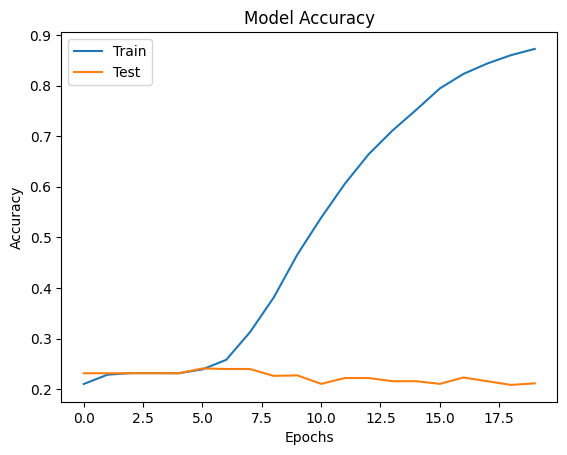

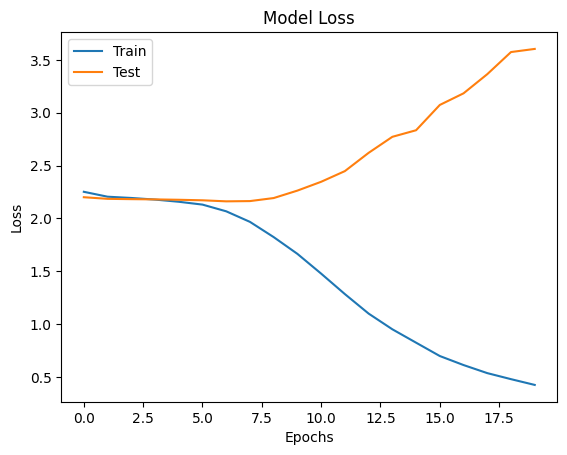

In [26]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split

# Load the mBERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=num_classes)
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize the Tenglish input
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=512)

# Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_encodings['input_ids'], y_train, epochs=3, validation_data=(test_encodings['input_ids'], y_test))


c:\Users\Vamshi\Desktop\custommodels\text_classification\venv\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Vamshi\.cache\huggingface\hub\models--bert-base-multilingual-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [33]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# Ensure X_train and X_test are lists of strings
if not isinstance(X_train, list):
    X_train = X_train.tolist()  # If X_train is a DataFrame or NumPy array, convert to list
if not isinstance(X_test, list):
    X_test = X_test.tolist()    # If X_test is a DataFrame or NumPy array, convert to list

# Verify that the elements are strings
X_train = [str(x) for x in X_train]  # Convert elements to strings if necessary
X_test = [str(x) for x in X_test]

# Load the mBERT model and tokenizer
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=num_classes)
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize the Tenglish input
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=512)

# Convert encodings to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test))

# Batch and shuffle the data
train_dataset = train_dataset.shuffle(len(X_train)).batch(16)
test_dataset = test_dataset.batch(16)

# Compile the model
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model
model.fit(train_dataset, epochs=3, validation_data=test_dataset)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3


239/239 [==============================] - 2016s 8s/step - loss: 2.3488 - accuracy: 0.1706 - val_loss: 2.3159 - val_accuracy: 0.2317
Epoch 2/3
239/239 [==============================] - 2080s 9s/step - loss: 2.2975 - accuracy: 0.1900 - val_loss: 2.4280 - val_accuracy: 0.0692
Epoch 3/3
178/239 [=====================>........] - ETA: 18:32 - loss: 2.2845 - accuracy: 0.1956

KeyboardInterrupt: 

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam

# Define the model building function for KerasTuner with different model architectures
def build_model(hp):
    model_type = hp.Choice('model_type', ['LSTM', 'Bidirectional_LSTM', 'GRU'])  # Choose model type

    # Define parameters
    embedding_dim = hp.Int('embedding_dim', min_value=50, max_value=300, step=50)  # Hyperparameter search for embedding dimension
    lstm_units = hp.Int('lstm_units', min_value=64, max_value=512, step=64)  # Hyperparameter search for LSTM/GRU units
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)  # Hyperparameter search for dropout rate
    
    model = Sequential()
    
    # Embedding layer
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
    model.add(SpatialDropout1D(0.2))
    
    # Model layers (LSTM/Bidirectional_LSTM/GRU) with variable units
    if model_type == 'LSTM':
        model.add(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    elif model_type == 'Bidirectional_LSTM':
        model.add(Bidirectional(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)))
    elif model_type == 'GRU':
        model.add(GRU(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    
    # Dense layer with variable size
    model.add(Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(dropout_rate))
    
    # Output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model with a learning rate search
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Initialize the KerasTuner RandomSearch for hyperparameter tuning
tuner = kt.RandomSearch(
    build_model,  # Function to build the model
    objective='val_accuracy',  # Optimizing validation accuracy
    max_trials=10,  # Number of trials to test different hyperparameters
    executions_per_trial=3,  # Number of times to train the model per trial
    directory='kt_dir',  # Directory to store results
    project_name='model_comparison'
)

# Perform the hyperparameter search on training data with validation data
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Get the best hyperparameters and best model
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hyperparameters)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the best model
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
